# CH07. k-최근접 이웃 실습

## 실습 순서

0. 사용할 라이브러리와 패키지 불러오기

1.     (데이터) 데이터 불러오기 및 성분 추출하기
2.   (모델) 모델 구성하기
3.   (모델 학습) 모델 학습하기
4.   (모델 성능 평가) 모델 성능 평가하기
5.   (모델 성능 평가) 최적의 k 값 찾기
6.   (결과) 모델 동작 시각화하기

## [실습 7-1] scikit-learn 라이브러리를 이용한 k-최근접 이웃



### 0. 사용할 라이브러리와 패키지 불러오기




In [1]:
# numpy, matplotlib, pandas를 각각 np, plt, pd로 재지정해 불러온다.
# scikit-learn(sklearn)에서 사용할 패키지를 불러온다.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import math

### 1. 데이터 불러오기 및 성분 추출하기



In [2]:
# 농구 관련 csv 데이터를 불러온다.
train = pd.read_csv('basketball_train.csv')
test = pd.read_csv('basketball_test.csv')

print(train)
print(test)

    Unnamed: 0            Player Pos   3P  TRB  BLK
0           26   Wayne Ellington  SG  2.4  2.1  0.1
1           86      Nik Stauskas  SG  1.7  2.8  0.4
2           60          Alex Len   C  0.0  6.6  1.3
3           45       Buddy Hield  SG  1.8  3.3  0.1
4           68       Jodie Meeks  SG  1.6  2.1  0.1
..         ...               ...  ..  ...  ...  ...
75          82        J.R. Smith  SG  2.3  2.8  0.3
76           5     Nicolas Batum  SG  1.8  6.2  0.4
77          40  Montrezl Harrell   C  0.0  3.8  0.7
78          22      Troy Daniels  SG  2.1  1.5  0.1
79          43       John Henson   C  0.0  5.1  1.3

[80 rows x 6 columns]
    Unnamed: 0                    Player Pos   3P   TRB  BLK
0           96               Dwyane Wade  SG  0.8   4.5  0.7
1           39              Tim Hardaway  SG  1.9   2.8  0.2
2           21           Jordan Crawford  SG  1.9   1.8  0.1
3           95            Nikola Vucevic   C  0.3  10.4  1.0
4           56               Kyle Korver  SG  2.

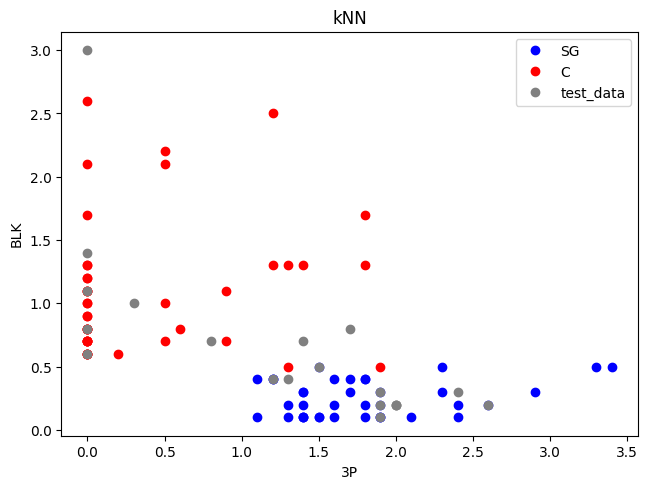

In [3]:
# 포지션 분류를 위한 특징을 선택하고 데이터를 준비한다.
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

# 학습 데이터를 시각화한다.
def plot_knn(feature, label, test_feature):
    plt.title('kNN')
    plt.plot(feature[label== "SG"]["3P"], feature[label == "SG"]["BLK"], 'o', c = "blue",
            label = "SG")
    plt.plot(feature[label == "C"]["3P"], feature[label == "C"]["BLK"], 'o', c = "red",
            label = "C")
    plt.plot(test_feature[:]["3P"], test_feature[:]["BLK"], 'o', c = "gray",
            label = "test_data")
    plt.tight_layout()
    plt.xlabel("3P") # x축 표시
    plt.ylabel("BLK") # y축 표시
    plt.legend()
    plt.show()

plot_knn(X_train, y_train.values.ravel(), X_test)

### 2. 모델 구성하기




In [4]:
# scikit-learn 라이브러리의 kNN 모델을 불러온다.
kNN = KNeighborsClassifier(n_neighbors = 1)

### 3. 모델 학습하기




In [5]:
# fit 함수를 통해 학습을 진행한다.
kNN.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

### 4. 모델 성능 평가하기




In [6]:
# predict 함수를 통해 k-최근접 이웃 함수로 얻은 예측값을 추출해 테스트 데이터로 평가한다.
# 이번에 실행한 모델은 k=1인 경우다.
y_pred_1 = kNN.predict(X_test)
accuracy_score(y_test, y_pred_1)

0.8

### 5. 최적의 k 값 찾기



In [9]:
# 실험적으로 정확도가 가장 높은 k 값을 찾는다.
max_val = 0
max_k = 0
for i in range(1,10,2):
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN.fit(X_train, y_train.values.ravel())
    y_pred = kNN.predict(X_test)
    if max_val < accuracy_score(y_test, y_pred):
        max_val = accuracy_score(y_test, y_pred)
        max_k = i

print(max_k)
print(max_val)

3
0.9


### 6. 모델 동작 시각화하기



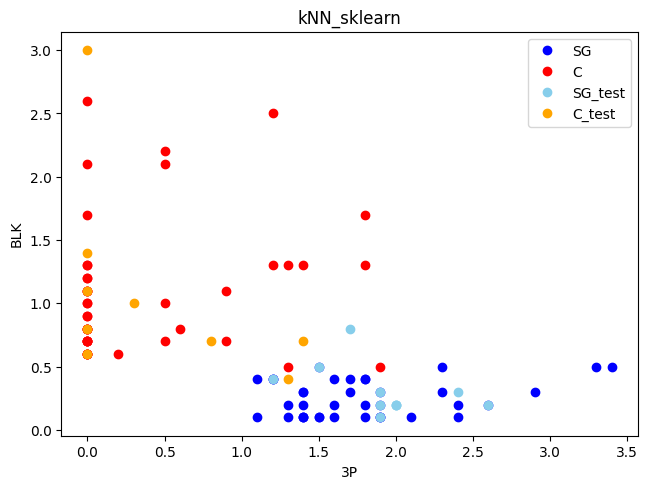

In [13]:
# kNN을 통해 얻은 분류 결과물을 시각화하여 표현한다.
def plot_knn_test(feature, label, test_feature, test_label):
    plt.title('kNN_sklearn')
    plt.plot(feature[label == "SG"]["3P"], feature[label == "SG"]["BLK"], 'o', c = "blue", label = "SG")
    plt.plot(feature[label == "C"]["3P"], feature[label == "C"]["BLK"], 'o', c = "red", label = "C")
    plt.plot(test_feature[test_label == "SG"]["3P"], test_feature[test_label == "SG"]["BLK"],'o', c = "skyblue", label ="SG_test")
    plt.plot(test_feature[test_label == "C"]["3P"], test_feature[test_label == "C"]["BLK"], 'o', c = "orange", label = "C_test")
    plt.tight_layout()
    plt.xlabel("3P")
    plt.ylabel("BLK")
    plt.legend()
    plt.show()

plot_knn_test(X_train, y_train.values.ravel(), X_test, y_pred_1)

## [실습 7-2] 함수를 직접 정의해 구현한 k-최근접 이웃



### 1. 데이터 불러오기 및 성분 추출하기



In [25]:
# 농구 관련 csv 데이터를 불러온다.
train = pd.read_csv('basketball_train.csv')
test = pd.read_csv('basketball_test.csv')

# 포지션 분류를 위한 특징을 선택하고 데이터를 준비한다.
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

### 2. 모델 구성하기


In [26]:
# kNN 모델의 학습을 위해 필요한 함수들을 정의한다.
k = 1

def distance(feature1, feature2):
    dist = 0
    for i in range(len(feature1)):
        dist += math.pow(feature1[i] - feature2[i], 2)
    return math.sqrt(dist)

### 3. 모델 학습하기



In [34]:
# kNN 알고리즘의 특성을 잘 생각하며 함수를 구현하자.
# k 값에 따른 결과의 비교를 쉽게 하기 위해 함수 형태로 구현한다.
def kNN(X_train, y_train, X_test, k):
    pred_result = []

    for i in range(len(X_test)):
        dist_list = []
        for j in range(len(X_train)):
            dist_list.append([distance(X_train[j],X_test[i]), y_train[j]])
        dist_list.sort() # list.sort( ): list 내의 값을 오름차순으로 정렬해준다.
        cnt = 0

        for j in range(k):
            if dist_list[j][1] == "C":
                cnt += 1
        if cnt>(k/2):
            pred_result.append(["C"])
        else:
            pred_result.append(["SG"])
    return pred_result

### 4. 알고리즘 수행하기



In [35]:
# k = 1인 경우의 결과부터 확인한다.
y_pred_1 = kNN(X_train.values, y_train.values, X_test.values, k)

### 5 모델 성능 평가하기



In [37]:
# 테스트 데이터를 이용하여 결과에 대한 성능을 평가한다.
accuracy_score(y_test, y_pred_1)

0.75

### 6. 최적의 k 찾기



In [38]:
# 실험적으로 정확도가 가장 높은 k의 값을 찾는다.
max_val = 0
max_k = 0
for i in range(1, 10, 2):
    y_pred = kNN(X_train.values, y_train.values, X_test.values, i)
    if max_val < accuracy_score(y_test, y_pred):
        max_val = accuracy_score(y_test, y_pred)
        max_k = i
print(max_k)
print(max_val)

3
0.9


### 7. 모델 동작 시각화하기


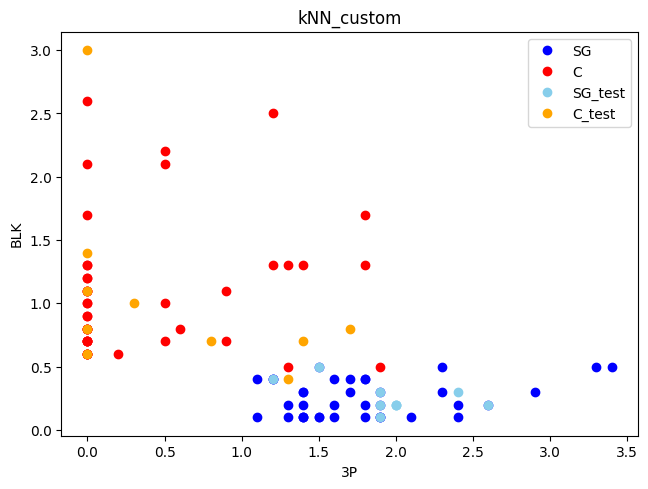

In [40]:
# kNN을 통해 얻은 분류 결과물을 시각화하여 표현한다.
def plot_knn_test(feature, label, test_feature, test_label):
    plt.title('kNN_custom')
    plt.plot(feature[label == "SG"]["3P"], feature[label == "SG"]["BLK"], 'o', c = "blue",
            label="SG")
    plt.plot(feature[label == "C"]["3P"], feature[label == "C"]["BLK"],' o', c = "red",
            label = "C")
    plt.plot(test_feature[test_label == "SG"]["3P"], test_feature[test_label == "SG"]["BLK"],
             'o', c = "skyblue", label = "SG_test")
    plt.plot(test_feature[test_label == "C"]["3P"], test_feature[test_label == "C"]["BLK"],
             'o', c = "orange", label = "C_test")
    plt.tight_layout()
    plt.xlabel("3P")
    plt.ylabel("BLK")
    plt.legend()
    plt.show()

plot_knn_test(X_train, y_train.values.ravel(), X_test, np.array(y_pred_1).flatten())